**[버섯 품종 분류: 버섯 데이터셋 이진 분류]**
====
***코드 작성 내용***
1. 데이터 전처리
- 결측치(NA) 제거
- EDA분석(Feature별 데이터 분포 확인)
2. SVM, Decision Tree, Neural Network 분류기
- 필요 시 데이터 변환(Feature값은 Categorical 데이터로 분류 모델을 위해서 One-hot encoding 필요)
- Train/Test 데이터 나누기 (8:2 비율)
- 모델 훈련
- 모델 평가

**<1. 데이터 전처리>**

- 결측치(NA) 제거
- 
EDA분석(Feature별 데이터 분포 확인)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#(0) 데아터셋 훑어보기
#데이터 variable 확인
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


*변수 개수: 총 22개*
1. 목표변수(y)
* class 변수: p=독성, e=식용가능
2. 설명변수(x)
> 버섯의 구조(위->아래 순으로): 1. 자실체 - 갓(cap), 주름살(gill-attached), 턱받이(ring), 줄기(stalk), 홈씨/포자(spore), 대주머니/균포(veil), | 2. 균사체 - 균사/팡이실(root)
* cap-shape(갓 모양): b=종 모양, c=원뿔 모양, x=볼록함, f=평평함, k=혹 모양, s=움푹 들어간 모양
* cap-surface(갓 표면): f=섬유 모양, g=폭이 좁고 길게 파임, y=비늘로 덮임, s=매끄러움
* cap-color(갓 색깔): n=갈색, b=담황색, c=계피색, g=회색, r=녹색, p=분홍색, u=보라색, e=빨간색, w=하얀색, y=노란색
* bruises: t=흠(움푹들어간 곳)이 있음, f=흥이 없음
* odor(냄새): a=아몬드향. i=아니스향, c=크레오소트향, y=생선향, f=악취, m=퀴퀴한, n=무향, p=톡쏘는 냄새, s=매운 냄새
* gill-attachment(주름살): a=모든 지점에 균일한 두께로 형성되어 있음, d=강하하는 모양새(갓부터 줄기로 이어지는 모양새), f=줄기에는 닿지 않고 갓아래 부분에만 형성됨, n= 톱니 모양
* gill-spacing(주름의 간격): c=가까움, w=빽빽함, d=멀리떨어져있음
* gill-size(주름의 크기): b=폭넓음, n=폭좁음
* gill-type(주름 색상): k=검정, n=갈색, b=담황색, h=초콜릿색, g=회색, r=녹색, o=주황, p=분홍, u=보라, e=빨강, w=하양, y=노랑
* stalk-shape(줄기 모양): e= 확장됨, t= 가늘어짐
* stalk-root(뿌리): b= 둥글납작함, c=곤봉 모양, u=컵 모양, e=평평함, z=균사다발들로 이뤄짐, r=뿌리깊이 고정됨, ?=뿌리 분실됨
* stalk-surface-above-ring(턱받이 위 줄기 표면): f=섬유 모양, y=비늘로 뒤덮임, k=부드러움, s=매끄러움
* stalk-surface-below-ring(턱받이 아래 줄기 표면): f=섬유 모양, y=비늘로 뒤덮임, k=부드러움, s=매끄러움
* stalk-color-above-ring(턱받이 위 줄기 색상): n=길색, b=딤황색, c=시나몬색, g=회색, o=주황색,p=분홍, e=빨강, w=하양, y=노랑
* stalk-color-below-ring(턱받이 아래 줄기 색상): n=길색, b=딤황색, c=시나몬색, g=회색, o=주황색,p=분홍, e=빨강, w=하양, y=노랑
* veil-type(균포 유형): p=부분적으로 형성, u=전반적으로 형성
* veil-color(균포 색상): n=갈색, o=주황, w=하양, y=노랑
* ring-number(턱받이 개수): n=0개, o=1개, t=2개
* ring-type(턱받이 유형): c=가볍고 얇음, e=극히 미소함, f=활짝 벌어짐, l=큼, n=없음, p=늘어짐, s=덮개, z=띠 모양
* spore-print-color(포자 색상): k=검정, n=길섹, b=담황색, h=초콜릿색, r=녹색, o=주황, u=보라, w=하양, y=노랑
* population(밀도): a=풍부함, c=무리를 이룸, n=여럿 모여있음, s=드문드문 있음, v=각각 존재(더욱 흝어져있음), y=독립적으로 존재
* habitat(서식지): g=풀/잔디, l=나뭇잎, m=목초지, p=길, u=도시, w=쓰레기, d=나무

In [4]:
#데이터의 Dimension(row, col) 확인
df.shape

(8124, 23)

In [5]:
#(1) 결측치(NA) 조사 및 제거

#각 열별 결측치 조사
missing_values = df.isnull().sum()
print(missing_values)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


==> 본 데이터셋의 모든 열에 대해 결측치(NA)는 존재하지 않음!

In [6]:
#(2) 데이터탐험(EDA): Feature별 데이터분포 확인

#Variavle별 데이터분포 확인
df.info() #각 feature들의 속성 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

==> 정수형, 실수값이 아닌 문자열과 특별한 기호(ex-?)로 이뤄져있으므로, 각 변수 확인 결과 'object'로 표시됨을 확인할 수 있음

 +) 모든 열이 8124개 데이터로 이뤄져있음을 확인할 수 있음

In [7]:
#데이터셋의 요약정보(기술통계량) 확인
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


==> 데이터셋 자체가 int, float형이 아니고 object로만 구성되어있으므로, 평균값(mean), 표준편차(std), 최소값(min), 최대값(max), 사분위수(25%, 50%, 75%)는 결과에서 자동 제외됨.

In [8]:
#민약, 모든 요소들을 표시하라고 한다면?
df.describe(include='all') #==> 그래도 평균값(mean), 표준편차(std), 최소값(min), 최대값(max), 사분위수(25%, 50%, 75%)는 나오지 않음!

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
#이진 범주형 데이터인 목표변수(class)의 데이터별 빈도수 확인
unique_values = df['class'].value_counts()
unique_values

class
e    4208
p    3916
Name: count, dtype: int64

==> 판정결과(class): 전체 8124개 중, 식용가능 버섯 - 4208개, 독버섯 - 3916개

In [10]:
#각 변수별 데이터구성 및 개수 출력
for column in df.columns:
    print(f"=== {column} ===")
    print(df[column].value_counts())
    print()

=== class ===
class
e    4208
p    3916
Name: count, dtype: int64

=== cap-shape ===
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

=== cap-surface ===
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

=== cap-color ===
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

=== bruises ===
bruises
f    4748
t    3376
Name: count, dtype: int64

=== odor ===
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

=== gill-attachment ===
gill-attachment
f    7914
a     210
Name: count, dtype: int64

=== gill-spacing ===
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

=== gill-size ===
gill-size
b    5612
n    2512
Name: count, dtype: int64

=== gill-color ===
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e    

In [11]:
#집계함수 활용: 목표변수인 'class' 기준으로 묶어주기
    
    #경고문구 없애주기
import warnings
warnings.filterwarnings("ignore")

df.groupby('class').apply(lambda x: x.mode()) #식용유무 결과를 기준으로 최빈값 계산

,,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,,
e,0,e,x,f,n,t,n,f,c,b,w,...,s,w,w,p,w,o,p,n,v,d
p,0,p,x,y,n,f,f,f,c,n,b,...,k,w,w,p,w,o,e,w,v,d


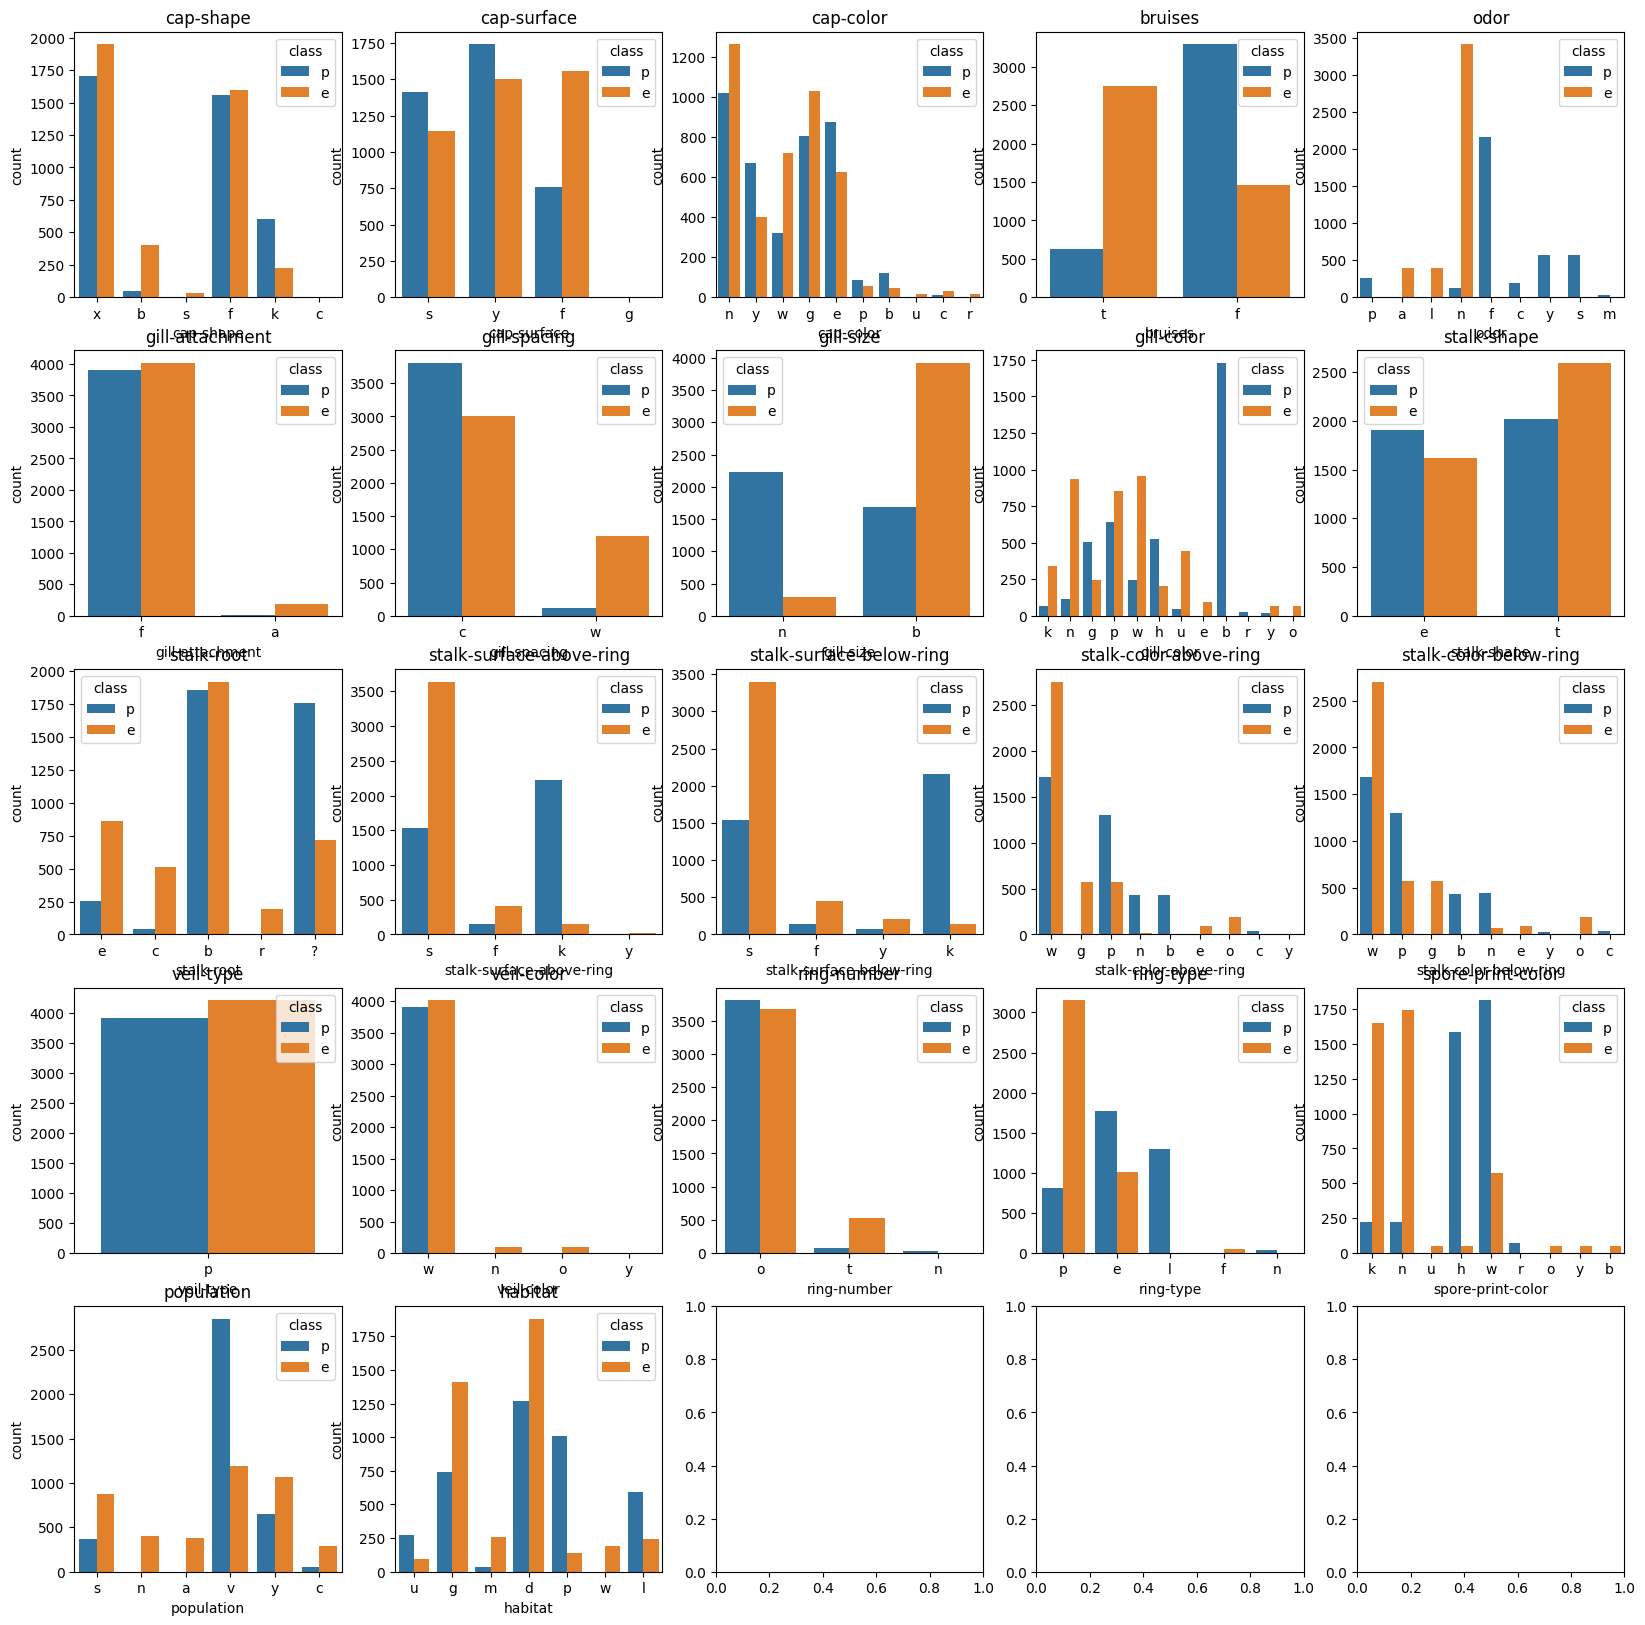

In [12]:
#문자형 데이터를 갖는 변수의 분포 살펴보기 1: 다중변수 데이터탐험

#막대 그래프(barchart, countplot): 각 독립변수(22개)별 목표변수(class)의 빈도수 살펴보기

fig, axs = plt.subplots(5,5,figsize=(20,20)) #5x5 공간 생성

sns.countplot(data=df, x='cap-shape', hue='class', ax=axs[0,0]) #0행 0열에 배치
axs[0, 0].set_title('cap-shape') # subplot 제목 추가
sns.countplot(data=df, x='cap-surface', hue='class', ax=axs[0,1]) #0행 1열에 배치
axs[0, 1].set_title('cap-surface')
sns.countplot(data=df, x='cap-color', hue='class', ax=axs[0,2]) #0행 2열에 배치
axs[0, 2].set_title('cap-color')
sns.countplot(data=df, x='bruises', hue='class', ax=axs[0,3]) #0행 3열에 배치
axs[0, 3].set_title('bruises')
sns.countplot(data=df, x='odor', hue='class', ax=axs[0,4]) #0행 4열에 배치
axs[0, 4].set_title('odor')
sns.countplot(data=df, x='gill-attachment', hue='class', ax=axs[1,0]) #1행 0열에 배치
axs[1, 0].set_title('gill-attachment')
sns.countplot(data=df, x='gill-spacing', hue='class', ax=axs[1,1]) #1행 1열에 배치
axs[1, 1].set_title('gill-spacing')
sns.countplot(data=df, x='gill-size', hue='class', ax=axs[1,2]) #1행 2열에 배치
axs[1, 2].set_title('gill-size')
sns.countplot(data=df, x='gill-color', hue='class', ax=axs[1,3]) #1행 3열에 배치
axs[1, 3].set_title('gill-color')
sns.countplot(data=df, x='stalk-shape', hue='class', ax=axs[1,4]) #1행 4열에 배치
axs[1, 4].set_title('stalk-shape')
sns.countplot(data=df, x='stalk-root', hue='class', ax=axs[2,0]) #2행 0열에 배치
axs[2, 0].set_title('stalk-root')
sns.countplot(data=df, x='stalk-surface-above-ring', hue='class', ax=axs[2,1]) #2행 1열에 배치
axs[2, 1].set_title('stalk-surface-above-ring')
sns.countplot(data=df, x='stalk-surface-below-ring', hue='class', ax=axs[2,2]) #2행 2열에 배치
axs[2, 2].set_title('stalk-surface-below-ring')
sns.countplot(data=df, x='stalk-color-above-ring', hue='class', ax=axs[2,3]) #2행 3열에 배치
axs[2, 3].set_title('stalk-color-above-ring')
sns.countplot(data=df, x='stalk-color-below-ring', hue='class', ax=axs[2,4]) #2행 4열에 배치
axs[2, 4].set_title('stalk-color-below-ring')
sns.countplot(data=df, x='veil-type', hue='class', ax=axs[3,0]) #3행 0열에 배치
axs[3, 0].set_title('veil-type')
sns.countplot(data=df, x='veil-color', hue='class', ax=axs[3,1]) #3행 1열에 배치
axs[3, 1].set_title('veil-color')
sns.countplot(data=df, x='ring-number', hue='class', ax=axs[3,2]) #3행 2열에 배치
axs[3, 2].set_title('ring-number')
sns.countplot(data=df, x='ring-type', hue='class', ax=axs[3,3]) #3행 3열에 배치
axs[3, 3].set_title('ring-type')
sns.countplot(data=df, x='spore-print-color', hue='class', ax=axs[3,4]) #3행 4열에 배치
axs[3, 4].set_title('spore-print-color')
sns.countplot(data=df, x='population', hue='class', ax=axs[4,0]) #4행 0열에 배치
axs[4, 0].set_title('population')
sns.countplot(data=df, x='habitat', hue='class', ax=axs[4,1]) #4행 1열에 배치
axs[4, 1].set_title('habitat')

plt.show()

In [13]:
#범주형 변수간 상관관계 분석: '상호정보량(Mutual Information)' 분석
from sklearn.metrics import mutual_info_score

#목표변수(class)와 22개 설명변수간 상호정보량 계산
mi_1 = mutual_info_score(df['cap-shape'], df['class'])
mi_2 = mutual_info_score(df['cap-surface'], df['class'])
mi_3 = mutual_info_score(df['cap-color'], df['class'])
mi_4 = mutual_info_score(df['bruises'], df['class'])
mi_5 = mutual_info_score(df['odor'], df['class'])
mi_6 = mutual_info_score(df['gill-attachment'], df['class'])
mi_7 = mutual_info_score(df['gill-spacing'], df['class'])
mi_8 = mutual_info_score(df['gill-size'], df['class'])
mi_9 = mutual_info_score(df['gill-color'], df['class'])
mi_10 = mutual_info_score(df['stalk-shape'], df['class'])
mi_11 = mutual_info_score(df['stalk-root'], df['class'])
mi_12 = mutual_info_score(df['stalk-surface-above-ring'], df['class'])
mi_13 = mutual_info_score(df['stalk-surface-below-ring'], df['class'])
mi_14 = mutual_info_score(df['stalk-color-above-ring'], df['class'])
mi_15 = mutual_info_score(df['stalk-color-below-ring'], df['class'])
mi_16 = mutual_info_score(df['veil-type'], df['class'])
mi_17 = mutual_info_score(df['veil-color'], df['class'])
mi_18 = mutual_info_score(df['ring-number'], df['class'])
mi_19 = mutual_info_score(df['ring-type'], df['class'])
mi_20 = mutual_info_score(df['spore-print-color'], df['class'])
mi_21 = mutual_info_score(df['population'], df['class'])
mi_22 = mutual_info_score(df['habitat'], df['class'])

print("Mutual Information between cap-shape and class:", mi_1)
print("Mutual Information between cap-surface and class:", mi_2)
print("Mutual Information between cap-color and class:", mi_3)
print("Mutual Information between bruises and class:", mi_4)
print("Mutual Information between odor and class:", mi_5)
print("Mutual Information between gill-attachment and class:", mi_6)
print("Mutual Information between gill-spacing and class:", mi_7)
print("Mutual Information between gill-size and class:", mi_8)
print("Mutual Information between gill-color and class:", mi_9)
print("Mutual Information between stalk-shape and class:", mi_10)
print("Mutual Information between stalk-root and class:", mi_11)
print("Mutual Information between stalk-surface-above-ring and class:", mi_12)
print("Mutual Information between stalk-surface-below-ring and class:", mi_13)
print("Mutual Information between stalk-color-above-ring and class:", mi_14)
print("Mutual Information between stalk-color-below-ring and class:", mi_15)
print("Mutual Information between veil-type and class:", mi_16)
print("Mutual Information between veil-color and class:", mi_17)
print("Mutual Information between ring-number and class:", mi_18)
print("Mutual Information between ring-type and class:", mi_19)
print("Mutual Information between spore-print-color and class:", mi_20)
print("Mutual Information between population1 and class:", mi_21)
print("Mutual Information between habitat and class:", mi_22)

Mutual Information between cap-shape and class: 0.033823296367129274
Mutual Information between cap-surface and class: 0.019817239238693947
Mutual Information between cap-color and class: 0.024987458856163602
Mutual Information between bruises and class: 0.13334729815296098
Mutual Information between odor and class: 0.6280433159496361
Mutual Information between gill-attachment and class: 0.009818448701319753
Mutual Information between gill-spacing and class: 0.06992689455313209
Mutual Information between gill-size and class: 0.15953085622740493
Mutual Information between gill-color and class: 0.2890267947127602
Mutual Information between stalk-shape and class: 0.005210229713572712
Mutual Information between stalk-root and class: 0.0934484654110997
Mutual Information between stalk-surface-above-ring and class: 0.19735674633153394
Mutual Information between stalk-surface-below-ring and class: 0.188462887642013
Mutual Information between stalk-color-above-ring and class: 0.175952066284101

ㄴ> 위 코드는 '상호정보량' 분석 결과임

본 데이터셋은 모든 데이터가 문자형으로 구성되어 있어 산점도 행렬 등 그간 배웠던 함수를 이용해 변수간 상관관계를 분석하는 데 어려움이 있음. 이에 '상호정보량'이라는 새로운 방식을 이용해 문자형 변수 간 상관관계 분석을 시도해보았다. 

> '상호정보량' 방식이란? 두 변수 간의 상호 의존성을 측정하는 데 사용. 두 변수 간 정보 이득을 측정해 상호정보량을 계산함. 범주형 데이터 간의 상관관계를 측정하는 데 있어 '조건부 엔트로피' 방식과 함께 유용하다.

==> 결과: 목표변수(class)에 대한 상관관계는 "odor(0.628) > spore-print-color> gill-color > ring-type > stalk-surface-above-ring > stalk-surface-below-ring > stalk-color-above-ring > stalk-color-below-ring > gill-size > population > bruises > habitat > stalk-root(0.0934) > gill-spacing > cap-shape > ring-number > cap-color > cap-surface > veil-color > gill-attachment > ... > vail-type(0.0)" 순으로 크게 나타남.

    'veil-type'과 'class'의 상호정보량은 0으로, veil-type은 식용유무와 아무런 관계가 없다고 볼 수 있음. 두 변수는 서로 독립적이다. 

**<2. SVM, Decision Tree, Neural Network 분류기>**

- 필요 시 데이터 변환(Feature값은 Categorical 데이터로 분류 모델을 위해서 One-hot encoding 필요)
- Train/Test 데이터 나누기 (8:2 비율)
- 모델 훈련
- 모델 평가

#(1) 데이터 변환: One-hot encoding 필요 여부

*Q. One-hot encoding이 필요한 모델?*
> * SVM(Support Vector Machine) model
: 일반적으로 SVM은 범주형 데이터를 처리하는 데 직접적으로 사용되지 않음. 대부분의 SVM 구현은 수치형 데이터만을 입력으로서 사용한다. 그러나, 범주형 데이터를 포함한 데이터셋을 SVM에 입력하려면 범주형 변수를 수치형으로 변환해야 함. ==> SVM을 사용할 때는 범주형 데이터들을 수치형 데이터로 변환해주는 작업이 필요함.
> * 의사결정나무(Decision Tree) model
: 의사결정나무는 범주형데이터를 바로 입력으로서 사용할 수 있음. 즉, One-hot encoding을 거치지 않더라도 충분히 의사결정나무를 훈련시킬 수 있음. 의사결정나무는 범주형 변수의 값을 기준으로 분할하는 작업이 가능하다. ==> 의사결정나무를 사용할 때는 범주형 데이터들을 수치형 데이터로 변환해주는 작업이 필요하지 않음. 
> * 신경망(Neural Network) model
: 마찬가지로 One-hot encoding을 거치지 않고도 범주형 데이터를 처리할 수 있지만, 신경망 구조 중 일부에만 해당됨. 대부분의 신경망 모델은 범주형 변수를 수치형데이터로 변환하여 사용하는 것이 바람직하다. ==> Neural Nework를 사용할 때도 범주형 데이터들을 수치형 데이터로 변환해주는 작업이 필요함. 

==> SVM 모델링할 때는 one-hot encoding 작업을 필수로 거쳐야하지고, 신경망 모델링할 때는 one-hot encoding 작업이 필수는 아니지만, 수치형데이터로 변환하는 경우 적용할 수 있는 신경망 구조의 폭이 넓어지므로 one-hot encoding을 거치는 게 좋음.

    ==> SVM, Neural Network 전에는 One-hot encoding 적용. Decision Tree 전에는 One-hot encoding 적용없이 본래 데이터셋(df) 그대로 적용

In [14]:
#(1) One-hot encoding을 거친 데이터셋 만들기: 범주형데이터를 -> 수치형데이터로 변환하기

#문자형 데이터로 이루어진 변수를 One-hot encoding
df_encoded = pd.get_dummies(df)

print("원래 데이터셋 : ")
print(df)
print("원-핫 인코딩 후 데이터셋 : ")
print(df_encoded)

원래 데이터셋 : 
     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               

==> One-hot encoding 변환 결과(df_encoded): 문자형으로 구성된 모든 데이터들이 불리언 값(True(1), False(0))으로 표시됨을 확인 가능

In [15]:
#(2) Train, Test data 비율 나누기(8:2 비율)
from sklearn.model_selection import train_test_split

#원-핫 인코딩 버전(df_encoded)에 대해 적용
X_en = np.array(df_encoded[['cap-shape_b', 'cap-shape_c', 'cap-shape_x', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
                            'cap-surface_f', 'cap-surface_g', 'cap-surface_y', 'cap-surface_s',
                            'cap-color_n', 'cap-color_b', 'cap-color_c', 'cap-color_g', 'cap-color_r', 'cap-color_p', 'cap-color_u', 'cap-color_e', 'cap-color_w', 'cap-color_y',
                            'bruises_t', 'bruises_f',
                            'odor_a', 'odor_l', 'odor_c', 'odor_y', 'odor_f', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 
                            'gill-attachment_a', 'gill-attachment_f',
                            'gill-spacing_c', 'gill-spacing_w',
                            'gill-size_b', 'gill-size_n', 
                            'gill-color_k', 'gill-color_n', 'gill-color_b', 'gill-color_h', 'gill-color_g', 'gill-color_r', 'gill-color_o', 'gill-color_p', 'gill-color_u', 'gill-color_e', 'gill-color_w', 'gill-color_y', 
                            'stalk-shape_e', 'stalk-shape_t',
                            'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-root_?',
                            'stalk-surface-above-ring_f', 'stalk-surface-above-ring_y', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 
                            'stalk-surface-below-ring_f', 'stalk-surface-below-ring_y', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s', 
                            'stalk-color-above-ring_n', 'stalk-color-above-ring_b', 'stalk-color-above-ring_c', 'stalk-color-above-ring_g', 'stalk-color-above-ring_o', 'stalk-color-above-ring_p', 'stalk-color-above-ring_e', 'stalk-color-above-ring_w', 'stalk-color-above-ring_y', 
                            'stalk-color-below-ring_n', 'stalk-color-below-ring_b', 'stalk-color-below-ring_c', 'stalk-color-below-ring_g', 'stalk-color-below-ring_o', 'stalk-color-below-ring_p', 'stalk-color-below-ring_e', 'stalk-color-below-ring_w', 'stalk-color-below-ring_y', 
                            'veil-type_p',
                            'veil-color_n', 'veil-color_o', 'veil-color_w', 'veil-color_y',
                            'ring-number_n', 'ring-number_o', 'ring-number_t', 
                            'ring-type_e', 'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p', 
                            'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_b', 'spore-print-color_h', 'spore-print-color_r', 'spore-print-color_o', 'spore-print-color_u', 'spore-print-color_w', 'spore-print-color_y', 
                            'population_a', 'population_c', 'population_n', 'population_s', 'population_v', 'population_y', 
                            'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w', 'habitat_d']])
Y_en = np.array(df_encoded[['class_e', 'class_p']])
    #Data Split - train data : test data = 8 : 2
X_en_train, X_en_test, Y_en_train, Y_en_test = train_test_split(X_en, Y_en, test_size=0.2, random_state=42)

#본 데이터셋(df)에 대해 적용
X = np.array(df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']])
Y = np.array(df['class'])
    #Data Split - train data : test data = 8 : 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
#(3) 모델 훈련
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier#본 데이터셋은 2차원의 출력변수를 지님. LinearSVC는 1차 변수만을 입력받으므로, 다차원의 출력변수를 처리할 수 있는 SGDClassifier를 활용

#SVM 모델 생성
svm = Pipeline([('scaler', MinMaxScaler()), ('sgd', SGDClassifier(loss='hinge'))])

#SVM 모델 학습시키기
    #SGD 또한 모델을 1차원으로 예상하므로 오류 발생, 따라서 출력변수를 다차원에서 1차원 배열로 변환해줌
Y_en_train = Y_en_train.argmax(axis=1)
svm.fit(X_en_train, Y_en_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('sgd', SGDClassifier())])

In [17]:
#Decision Tree 모델 생성: 지니 지수 기반으로
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Decision Tree 모델 생성: 지니지수 기준
clf_gini = DecisionTreeClassifier(criterion="gini", 
                                  max_depth = 5, min_samples_leaf = 3, random_state = 42) #max_depth: 변수의 개수가 많고 범주형 데이터가 많으므로 과적합 방지를 위해 상대적으로 작게 설정
                                                                                        #min_samples_leaf: 일반적으로 1% ~ 5% 정도의 샘플 수로 설정
#Decision Tree_gini 모델 학습시키기
clf_gini.fit(X_en_train, Y_en_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=42)

(DecisionTree 역시 범주형이 아닌, 수치형 데이터가 필요하다고 떠서 원핫인코딩을 거친 df_ecoded 데이터셋을 적용함)

[Text(0.5882352941176471, 0.9166666666666666, 'x[28] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(0.35294117647058826, 0.75, 'x[52] <= 0.5\ngini = 0.284\nsamples = 3666\nvalue = [627, 3039]'),
 Text(0.23529411764705882, 0.5833333333333334, 'x[61] <= 0.5\ngini = 0.124\nsamples = 3221\nvalue = [213, 3008]'),
 Text(0.17647058823529413, 0.4166666666666667, 'x[22] <= 0.5\ngini = 0.044\nsamples = 3077\nvalue = [69, 3008]'),
 Text(0.11764705882352941, 0.25, 'x[23] <= 0.5\ngini = 0.022\nsamples = 3042\nvalue = [34, 3008]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 3008\nvalue = [0, 3008]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.29411764705882354, 0.4166666666666667, 'gini = 0.0\nsamples = 144\nvalue = [144, 0]'),
 Text(0.47058823529411764, 0.5833333333333334, 'x[116] <= 0.5\ngini = 0.13\nsamples = 44

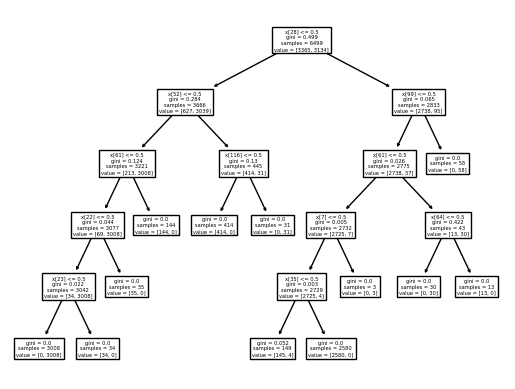

In [18]:
#gini지수 기반 Decision Tree 모델 시각화
tree.plot_tree(clf_gini)

In [19]:
#Decision Tree 모델 생성: 엔트로피 지수 기반으로
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                     max_depth = 5, min_samples_leaf = 3, random_state = 42)

#Decision Tree_entropy 모델 학습시키기
clf_entropy.fit(X_en_train, Y_en_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=42)

[Text(0.5, 0.9166666666666666, 'x[28] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(0.23076923076923078, 0.75, 'x[20] <= 0.5\nentropy = 0.66\nsamples = 3666\nvalue = [627, 3039]'),
 Text(0.15384615384615385, 0.5833333333333334, 'entropy = 0.0\nsamples = 2612\nvalue = [0, 2612]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[52] <= 0.5\nentropy = 0.974\nsamples = 1054\nvalue = [627, 427]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[54] <= 0.5\nentropy = 0.918\nsamples = 640\nvalue = [213, 427]'),
 Text(0.15384615384615385, 0.25, 'x[116] <= 0.5\nentropy = 0.582\nsamples = 496\nvalue = [69, 427]'),
 Text(0.07692307692307693, 0.08333333333333333, 'entropy = 0.0\nsamples = 427\nvalue = [0, 427]'),
 Text(0.23076923076923078, 0.08333333333333333, 'entropy = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(0.3076923076923077, 0.25, 'entropy = 0.0\nsamples = 144\nvalue = [144, 0]'),
 Text(0.38461538461538464, 0.4166666666666667, 'entropy = 0.0\nsamples = 414\nval

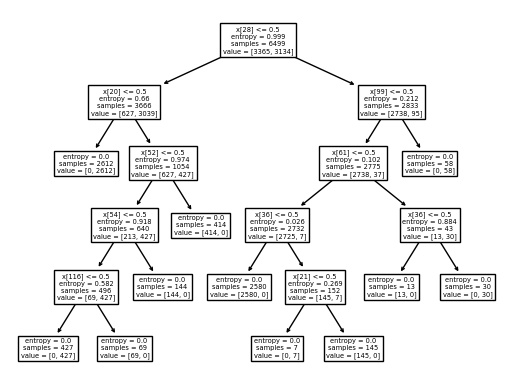

In [20]:
#entropy지수 기반 Decision Tree 모델 시각화
tree.plot_tree(clf_entropy)

In [21]:
#Neural Network 모델 생성

#입력값의 개수 조회
print("X_en_train의 형태 : ", X_en_train.shape)

X_en_train의 형태 :  (6499, 117)


In [22]:
#(4) Neural Network 모델 생성 및 검증
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense #Dense: NN에서 fully-connected된 층
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

Y_en_train_vec = to_categorical(Y_en_train, num_classes=3) #train data에 대해 3개의 bit를 갖게 함
Y_en_test_vec = to_categorical(Y_en_test, num_classes=3) #test data에 대해 3개의 bit를 갖게 함

#Create a new Sequential object
model = Sequential() #이곳에 총 세 개의 layer가 담김: input layer, hidden layer, output layer

#Create an input layer, 10 nodes
model.add(Dense(10, input_shape=(117,))) #10개의 뉴런으로 구성된 첫번째 layer(입력층), 117개의 입력값 가짐
#Dropout 추가
model.add(Dropout(0.2)) #드롭아웃 비율은 0.2로 설정
#Create a hidden layer, 10 nodes
model.add(Dense(10, activation = 'relu')) #10개의 뉴런으로 구성된 두번째 layer(은닉층), ReLU 활성화함수 사용
#Create an output layer, 3 nodes
model.add(Dense(3, activation='softmax')) 

#모델의 구조 확인
model.summary()

#Compile model
model.compile(optimizer='adam',                #최적화함수로 adam 사용
              loss='binary_crossentropy',      #이진 분류 시, binary_crossentropy 사용
              metrics=['acc'])                 #'acc': 모델의 성능은 '정확도'로 판단

#모델 과적합방지를 위한 early_stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#NN모델 생성하기
model.fit(x=X_en_train, y=Y_en_train_vec, epochs=100, batch_size=2, validation_split=0.10, callbacks=[early_stopping])

2024-04-20 13:46:38.811466: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 13:46:38.811631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 13:46:38.973618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         1,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323 (5.17 KB)

 Trainable params: 1,323 (5.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.9045 - loss: 0.1884 - val_acc: 0.9969 - val_loss: 0.0080
Epoch 2/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.9986 - loss: 0.0042 - val_acc: 1.0000 - val_loss: 0.0012
Epoch 3/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9993 - loss: 0.0014 - val_acc: 1.0000 - val_loss: 6.9249e-04
Epoch 4/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9999 - loss: 3.7407e-04 - val_acc: 1.0000 - val_loss: 2.8257e-05
Epoch 5/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 1.0000 - loss: 1.2572e-04 - val_acc: 1.0000 - val_loss: 5.6733e-05
Epoch 6/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 1.0000 - loss: 1.5258e-04 - val_acc: 1.0000 - val_loss: 1.2616e-05
Epoch 7/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 1.0000 - loss: 1.9202e-04 - val_acc: 1.0000 - val_loss: 1.4208e-06
Epoch 8/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 1.0000 - loss: 8.2757e-06 - val_acc: 1.0000 - val_loss

In [23]:
#(4) 모델 평가

#SVM model test
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

#테스트 데이터에 대한 예측값 생성
Y_en_pred = svm.predict(X_en_test)

# 다중 레이블을 이진 분류로 변환
Y_en_test_binary = np.array([1 if any(label) else 0 for label in Y_en_test])

#정확도 평가
print("Accuracy : ", accuracy_score(Y_en_test_binary, Y_en_pred)*100)
#분류보고서 작성
print("Report : ", classification_report(Y_en_test_binary, Y_en_pred))

Accuracy :  48.12307692307692
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65      1625

    accuracy                           0.48      1625
   macro avg       0.50      0.24      0.32      1625
weighted avg       1.00      0.48      0.65      1625



In [24]:
#DecisionTree model test

#gini 지수 기반 Decision Tree 모델 test
Y_en_pred_gini = clf_gini.predict(X_en_test) #모델 예측값 생성 및 저장

# 다중 레이블을 이진 분류로 변환
Y_en_test_binary = [1 if any(label) else 0 for label in Y_en_test]

#모델 정확도 평가
print("Accuracy : ", accuracy_score(Y_en_test_binary, Y_en_pred_gini)*100)
#분류보고서 생성
print("Report : ", classification_report(Y_en_test_binary, Y_en_pred_gini))

Accuracy :  48.12307692307692
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65      1625

    accuracy                           0.48      1625
   macro avg       0.50      0.24      0.32      1625
weighted avg       1.00      0.48      0.65      1625



In [25]:
#entropy 지수 기반 Decision Tree 모델 test
Y_en_pred_entropy = clf_entropy.predict(X_en_test) #모델 예측값 생성 및 저장

# 다중 레이블을 이진 분류로 변환
Y_en_test_binary = [1 if any(label) else 0 for label in Y_en_test]

#모델 정확도 평가
print("Accuracy : ", accuracy_score(Y_en_test_binary, Y_en_pred_entropy)*100)
#분류보고서 생성
print("Report : ", classification_report(Y_en_test_binary, Y_en_pred_entropy))

Accuracy :  48.12307692307692
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65      1625

    accuracy                           0.48      1625
   macro avg       0.50      0.24      0.32      1625
weighted avg       1.00      0.48      0.65      1625



In [27]:
#Neural Network test
Y_en_pred = model.predict(X_en_test) #test data로 예측값 생성하기
Y_en_pred_ind = np.zeros(len(Y_en_pred))

for i in range(0, len(Y_en_pred)):
    print('실제값: ', Y_en_test_binary[i], ' / 예측값: ', np.argmax(Y_en_pred[i]), ' : ', Y_en_pred[i])
    Y_en_pred_ind[i] = np.argmax(Y_en_pred[i])
    
#모델의 정확도 평가
print("Accuracy : ", accuracy_score(Y_en_test_binary, Y_en_pred_ind)*100)
#분류 보고서 생성
print("Report : ", classification_report(Y_en_test_binary, Y_en_pred_ind))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
실제값:  1  / 예측값:  0  :  [0.99999994 0.         0.        ]
실제값:  1  / 예측값:  1  :  [0.         0.99999994 0.        ]
실제값:  1  / 예측값:  1  :  [0.         0.99999994 0.        ]
실제값:  1  / 예측값:  0  :  [0.99999994 0.         0.        ]
실제값:  1  / 예측값:  1  :  [0.         0.99999994 0.        ]
실제값:  1  / 예측값:  1  :  [0.         0.99999994 0.        ]
실제값:  1  / 예측값:  1  :  [2.1075333e-29 9.9999994e-01 1.1039086e-31]
실제값:  1  / 예측값:  1  :  [0.         0.99999994 0.        ]
실제값:  1  / 예측값:  0  :  [0.99999994 0.         0.        ]
실제값:  1  / 예측값:  0  :  [0.99999994 0.         0.        ]
실제값:  1  / 예측값:  0  :  [0.99999994 0.         0.        ]
실제값:  1  / 예측값:  1  :  [4.0233188e-26 9.9999994e-01 4.3753041e-28]
실제값:  1  / 예측값:  0  :  [0.99999994 0.         0.        ]
실제값:  1  / 예측값:  0  :  [0.99999994 0.         0.        ]
실제값:  1  / 예측값:  0  :  [9.9999994e-01 8.8722919e-31 1.7511644e-35]
실제값:  1  / 예측값:  0  :  [9.9999994e-01 4.1446051e-35 0.0000000e+0